In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [9]:
df = pd.read_csv('processed.cleveland.data', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'hd'
]

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Inspect Data

In [12]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [13]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [14]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

### Dealing with missing data

In [15]:
len(df)

303

In [16]:
len(df.loc[(df.ca == '?') | (df.thal == '?')])

6

In [17]:
df.loc[(df.ca == '?') | (df.thal == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [18]:
df = df.loc[(df.ca != '?') & (df.thal != '?')]

In [19]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [20]:
df.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

### Splitting data into independent and dependent variables

In [21]:
X = df.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [22]:
y = df.hd.copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

### Format independent variables with One-Hot Encoding

age - float<br>
sex - 0, 1<br>
cp - 1, 2, 3, 4<br>
trestbps - float<br>
chol - float<br>
fbs - 0, 1<br>
restecg - 0, 1, 2<br>
thalach - float<br>
exang - 0, 1<br>
oldpeak - float<br>
slope - 1, 2, 3<br>
ca - float<br>
thal - 3, 6, 7<br>

In [23]:
X.sex.unique()

array([1., 0.])

In [24]:
X.cp.unique()

array([1., 4., 3., 2.])

In [25]:
X.fbs.unique()

array([1., 0.])

In [26]:
X.restecg.unique()

array([2., 0., 1.])

In [27]:
X.exang.unique()

array([0., 1.])

In [28]:
X.slope.unique()

array([3., 2., 1.])

In [29]:
X.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

We can either use ColumnTransformer() from sklearn or get_dummies() from pandas to do One-Hot Encoding.

In [30]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [31]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

In [32]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


### Make dependent variable binary

In [33]:
print(y.unique())
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

[0 2 1 3 4]


array([0, 1], dtype=int64)

### Preliminary Classification Tree

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt .fit(X_train, y_train)

[Text(479.8318965517241, 390.7125, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(277.79741379310343, 356.73749999999995, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(169.5646551724138, 322.7625, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(122.66379310344828, 288.78749999999997, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(72.15517241379311, 254.81249999999997, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(43.293103448275865, 220.83749999999998, 'trestbps <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(28.862068965517242, 186.86249999999998, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(14.431034482758621, 152.8875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(43.293103448275865, 152.8875, 'exang <= 0.5\ngini = 

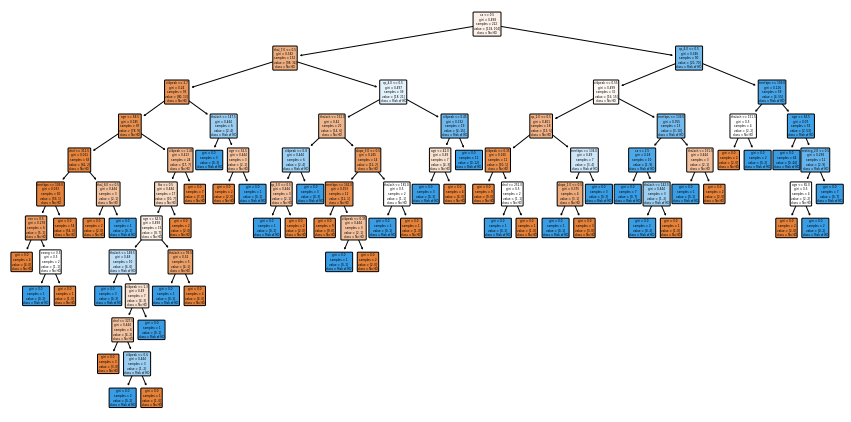

In [35]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['No HD', 'Risk of HD'],
         feature_names=X_encoded.columns)

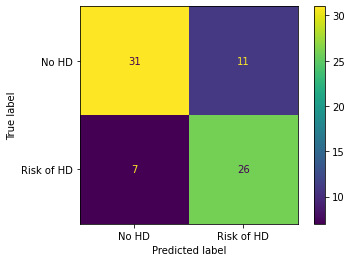

In [36]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Risk of HD'])

In [38]:
print(f'{(31/(31+11))*100:.2f} % predicted No HD')
print(f'{(26/(26+7))*100:.2f} % predicted Risk of HD')

73.81 % predicted No HD
78.79 % predicted Risk of HD


### Tree Pruning

In [40]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [41]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [42]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

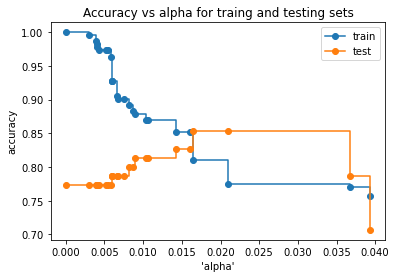

In [43]:
fig, ax = plt.subplots()
ax.set_xlabel("'alpha'")
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for traing and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

### Cross validation score

<AxesSubplot:xlabel='tree'>

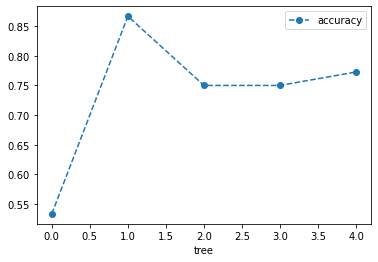

In [46]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)

df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [48]:
alpha_loop_scores = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_scores.append([ccp_alpha, np.mean(scores), np.std(scores)])

In [49]:
alpha_loop_scores

[[0.0, 0.6755555555555556, 0.09932976083537857],
 [0.0029529529529529544, 0.6755555555555556, 0.09932976083537857],
 [0.003861003861003862, 0.6799999999999999, 0.09317304439819664],
 [0.004054054054054055, 0.6799999999999999, 0.09317304439819664],
 [0.004095004095004095, 0.6799999999999999, 0.09317304439819664],
 [0.004293579293579285, 0.6799999999999999, 0.09317304439819664],
 [0.005148005148005148, 0.6799999999999999, 0.09317304439819664],
 [0.005412976001211295, 0.7026262626262627, 0.10306466054194952],
 [0.005787605787605791, 0.7162626262626264, 0.1039164702661334],
 [0.006006006006006006, 0.7162626262626264, 0.1039164702661334],
 [0.006006006006006006, 0.7162626262626264, 0.1039164702661334],
 [0.006006006006006006, 0.7162626262626264, 0.1039164702661334],
 [0.006675906675906675, 0.7162626262626264, 0.1039164702661334],
 [0.006756756756756757, 0.7162626262626264, 0.1039164702661334],
 [0.007573750220809049, 0.7027272727272728, 0.12205080223702487],
 [0.008115048793014888, 0.711717

<AxesSubplot:xlabel='alpha'>

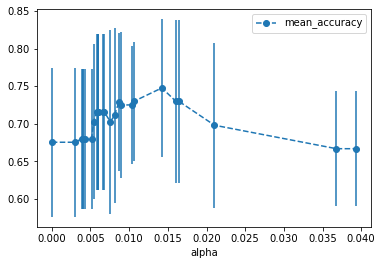

In [51]:
alpha_results = pd.DataFrame(alpha_loop_scores, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [52]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [53]:
optimal_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
optimal_alpha

20    0.014225
Name: alpha, dtype: float64

In [54]:
optimal_alpha = float(optimal_alpha)
optimal_alpha

0.014224751066856332

### Final tree

In [61]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha, criterion='gini')
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

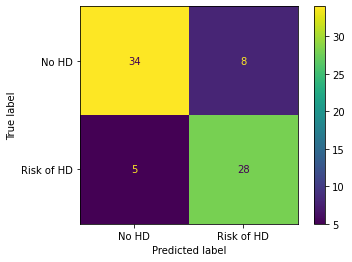

In [62]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['No HD', 'Risk of HD'])

In [57]:
print(f'{(34/(34+8))*100:.2f} % predicted No HD')
print(f'{(28/(28+5))*100:.2f} % predicted Risk of HD')

80.95 % predicted No HD
84.85 % predicted Risk of HD


[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Risk of HD'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Risk of HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Risk of HD'),
 Text(708.2307692307693, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nc

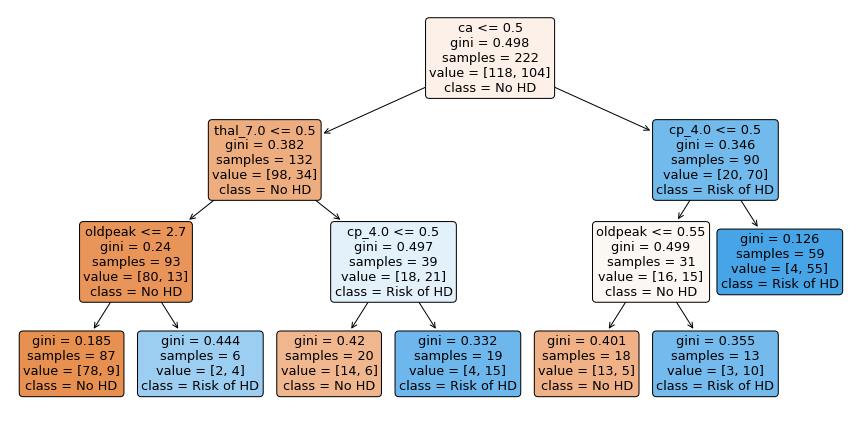

In [58]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=['No HD', 'Risk of HD'],
         feature_names=X_encoded.columns)